In [1]:
import numpy as np
import pandas as pd
import networkx as nx 

import glob
import numpy as np
import imageio
import os


import itertools
import copy
import matplotlib.pyplot as plt

# -*- coding: utf-8 -*-
#
#    Copyright (C) 2010 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.
#
# Authors:
#   Nima Mohammadi <nima.irt@gmail.com>
#   Aric Hagberg <hagberg@lanl.gov>
#   Mike Trenfield <william.trenfield@utsouthwestern.edu>
"""
Eulerian circuits and graphs.
"""
from itertools import combinations

import networkx as nx

# Definition of graph is given.

In [2]:
edgelist=pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

In [3]:
G = nx.Graph()

In [4]:
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    # g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())  # deprecated after NX 1.11
    G.add_edge(elrow[0], elrow[1], **elrow[2:].to_dict())

In [5]:
for i, nlrow in nodelist.iterrows():
    # g.node[nlrow['id']] = nlrow[1:].to_dict()  # deprecated after NX 1.11
    nx.set_node_attributes(G, {nlrow['id']:  nlrow[1:].to_dict()})  

In [6]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in G.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])

{'rs_end_north': (1772, -172),
 'v_rs': (1793, -484),
 'b_rs': (1747, -700),
 'g_rs': (1676, -775),
 'w_rs': (1646, -947)}

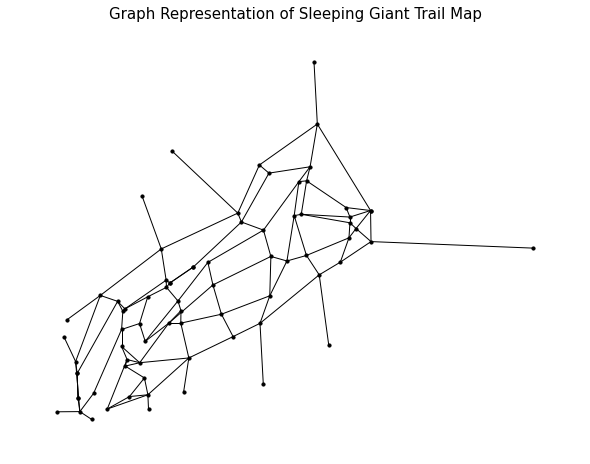

In [7]:
plt.figure(figsize=(8, 6))
nx.draw(G, pos=node_positions, node_size=10, node_color='black')
plt.title('Graph Representation of Sleeping Giant Trail Map', size=15)
plt.show()

## Howard county map given here:

In [8]:

trz5_wed_vertices=[ 'B1' , 'B2' , 'B3' , 'B4' , 'B5' , 'B6' , 'B7' , 'B8' , 'B9' , 'B10' , 'B11' , 'B12' , 'B13' , 'B14' , 'B15' , 'B16' , 'B17' , 'B18' , 'B19' , 'B20' , 'B21' , 'B22' , 'B23' , 'B24' , 'B25' , 'B26' , 'B27' , 'B28' , 'B29' , 'B30' , 'B31' , 'B32' , 'B33' , 'B34' , 'B35' , 'B36' , 'B37' , 'B38' , 'B39' , 'B40' , 'B41' , 'B42' , 'B43' , 'B44' , 'B45' , 'B46' , 'B47' , 'B48' , 'B49' , 'B50' , 'B51' , 'B52' , 'B53' , 'B54' , 'B55' , 'B56' , 'B57' , 'B58' , 'B59' , 'B60' , 'B61' , 'B62' , 'B63' , 'B64' , 'B65' , 'B66' , 'B67' , 'B68' , 'B69' , 'B70' , 'B71' , 'B72' , 'B73' , 'B74' , 'B75' , 'B76' , 'B77' , 'B82' , 'B83' , 'B84' , 'B85' , 'B86' , 'B87' , 'B88' , 'B89' , 'B90' , 'B91' , 'B92' , 'B93' , 'B94' , 'B95' , 'B96' , 'B97' , 'B98' , 'B99' , 'B100' , 'B101' , 'B102' , 'B103' , 'B104' , 'B105' , 'B106' , 'B107' , 'B108' , 'B109' , 'B110' , 'B111' , 'B112' , 'B113' ]

trz5_wed_edges=[('B1','B2'),('B2','B3'),('B3','B5'),('B3','B4'),('B4','B6'),('B6','B7'),('B6','B8'),('B4','B9'),('B9','B4'),('B2','B11'),('B11','B10'),('B11','B12'),('B12','B13'),('B12','B47'),('B47','B14'),('B14','B15'),('B14','B16'),('B47','B18'),('B18','B17'),('B18','B19'),('B19','B20'),('B19','B21'),('B21','B22'),('B21','B23'),('B47','B24'),('B24','B25'),('B24','B26'),('B26','B27'),('B26','B28'),('B26','B29'),('B24','B30'),('B30','B31'),('B31','B32'),('B31','B33'),('B33','B34'),('B33','B35'),('B35','B36'),('B36','B37'),('B36','B38'),('B38','B39'),('B38','B40'),('B35','B41'),('B41','B42'),('B41','B43'),('B43','B46'),('B46','B44'),('B46','B45'),('B35','B49'),('B49','B50'),('B49','B51'),('B51','B52'),('B51','B53'),('B53','B54'),('B54','B55'),('B54','B57'),('B54','B56'),('B53','B58'),('B58','B59'),('B58','B60'),('B60','B48'),('B60','B31'),('B30','B61'),('B61','B62'),('B61','B63'),('B61','B64'),('B64','B65'),('B64','B66'),('B64','B67'),('B67','B68'),('B68','B69'),('B68','B70'),('B70','B71'),('B70','B72'),('B72','B73'),('B73','B74'),('B73','B75'),('B75','B76'),('B75','B77'),('B72','B82'),('B82','B83'),('B83','B84'),('B83','B85'),('B85','B86'),('B85','B87'),('B87','B88'),('B87','B89'),('B89','B67'),('B89','B90'),('B90','B91'),('B91','B92'),('B91','B93'),('B90','B94'),('B82','B95'),('B95','B96'),('B95','B97'),('B97','B98'),('B97','B99'),('B97','B100'),('B100','B101'),('B101','B102'),('B101','B103'),('B103','B104'),('B103','B105'),('B105','B106'),('B105','B107'),('B100','B108'),('B108','B109'),('B108','B110'),('B108','B111'),('B111','B112'),('B111','B113')]
B=nx.Graph()
 
B.add_nodes_from(trz5_wed_vertices)
B.add_edges_from(trz5_wed_edges)

K = {('B1','B2'):413,('B2','B3'):177,('B3','B5'):390,('B3','B4'):400,('B4','B6'):423,('B6','B7'):138,('B6','B8'):381,('B4','B9'):1122,('B9','B4'):1122,('B2','B11'):912,('B11','B10'):358,('B11','B12'):2112,('B12','B13'):981,('B12','B47'):2022,('B47','B14'):223,('B14','B15'):266,('B14','B16'):1004,('B47','B18'):646,('B18','B17'):499,('B18','B19'):285,('B19','B20'):348,('B19','B21'):531,('B21','B22'):240,('B21','B23'):210,('B47','B24'):955,('B24','B25'):351,('B24','B26'):344,('B26','B27'):364,('B26','B28'):213,('B26','B29'):600,('B24','B30'):600,('B30','B31'):814,('B31','B32'):223,('B31','B33'):325,('B33','B34'):223,('B33','B35'):253,('B35','B36'):558,('B36','B37'):358,('B36','B38'):318,('B38','B39'):315,('B38','B40'):558,('B35','B41'):495,('B41','B42'):358,('B41','B43'):1142,('B43','B46'):308,('B46','B44'):213,('B46','B45'):285,('B35','B49'):502,('B49','B50'):344,('B49','B51'):367,('B51','B52'):180,('B51','B53'):236,('B53','B54'):574,('B54','B55'):207,('B54','B57'):197,('B54','B56'):276,('B53','B58'):210,('B58','B59'):148,('B58','B60'):764,('B60','B48'):203,('B60','B31'):253,('B30','B61'):253,('B61','B62'):279,('B61','B63'):466,('B61','B64'):476,('B64','B65'):184,('B64','B66'):440,('B64','B67'):404,('B67','B68'):531,('B68','B69'):302,('B68','B70'):518,('B70','B71'):528,('B70','B72'):440,('B72','B73'):322,('B73','B74'):646,('B73','B75'):223,('B75','B76'):331,('B75','B77'):364,('B72','B82'):1441,('B82','B83'):285,('B83','B84'):213,('B83','B85'):443,('B85','B86'):443,('B85','B87'):554,('B87','B88'):410,('B87','B89'):259,('B89','B67'):282,('B89','B90'):407,('B90','B91'):253,('B91','B92'):144,('B91','B93'):495,('B90','B94'):879,('B82','B95'):226,('B95','B96'):1441,('B95','B97'):440,('B97','B98'):197,('B97','B99'):180,('B97','B100'):335,('B100','B101'):226,('B101','B102'):249,('B101','B103'):348,('B103','B104'):285,('B103','B105'):279,('B105','B106'):272,('B105','B107'):591,('B100','B108'):535,('B108','B109'):217,('B108','B110'):187,('B108','B111'):358,('B111','B112'):351,('B111','B113'):240}

T = {('B1','B2'): 1,('B2','B3'): 1,('B3','B5'): 7,('B3','B4'): 3,('B4','B6'): 5,('B6','B7'): 2,('B6','B8'): 7,('B4','B9'): 4,('B9','B4'): 4,('B2','B11'): 5,('B11','B10'): 10,('B11','B12'): 20,('B12','B13'): 8,('B12','B47'): 2,('B47','B14'): 0,('B14','B15'): 20,('B14','B16'): 63,('B47','B18'): 10,('B18','B17'): 15,('B18','B19'): 3,('B19','B20'): 11,('B19','B21'): 7,('B21','B22'): 9,('B21','B23'): 9,('B47','B24'): 0,('B24','B25'): 11,('B24','B26'): 4,('B26','B27'): 12,('B26','B28'): 5,('B26','B29'): 19,('B24','B30'): 0,('B30','B31'): 0,('B31','B32'): 24,('B31','B33'): 0,('B33','B34'): 17,('B33','B35'): 0,('B35','B36'): 5,('B36','B37'): 37,('B36','B38'): 12,('B38','B39'): 32,('B38','B40'): 45,('B35','B41'): 0,('B41','B42'): 43,('B41','B43'): 0,('B43','B46'): 13,('B46','B44'): 34,('B46','B45'): 23,('B35','B49'): 7,('B49','B50'): 8,('B49','B51'): 7,('B51','B52'): 3,('B51','B53'): 1,('B53','B54'): 2,('B54','B55'): 5,('B54','B57'): 5,('B54','B56'): 5,('B53','B58'): 1,('B58','B59'): 8,('B58','B60'): 22,('B60','B48'): 10,('B60','B31'): 5,('B30','B61'): 0,('B61','B62'): 10,('B61','B63'): 12,('B61','B64'): 0,('B64','B65'): 8,('B64','B66'): 7,('B64','B67'): 0,('B67','B68'): 10,('B68','B69'): 13,('B68','B70'): 4,('B70','B71'): 15,('B70','B72'): 9,('B72','B73'): 4,('B73','B74'): 17,('B73','B75'): 2,('B75','B76'): 9,('B75','B77'): 10,('B72','B82'): 23,('B82','B83'): 0,('B83','B84'): 9,('B83','B85'): 0,('B85','B86'): 14,('B85','B87'): 0,('B87','B88'): 14,('B87','B89'): 0,('B89','B67'): 0,('B89','B90'): 7,('B90','B91'): 1,('B91','B92'): 7,('B91','B93'): 13,('B90','B94'): 27,('B82','B95'): 0,('B95','B96'): 39,('B95','B97'): 0,('B97','B98'): 9,('B97','B99'): 6,('B97','B100'): 0,('B100','B101'): 3,('B101','B102'): 8,('B101','B103'): 3,('B103','B104'): 9,('B103','B105'): 1,('B105','B106'): 10,('B105','B107'): 17,('B100','B108'): 8,('B108','B109'): 8,('B108','B110'): 5,('B108','B111'): 1,('B111','B112'): 11,('B111','B113'): 9}
        
U = {('B1','B2'):  ' Existing' ,('B2','B3'):  ' Existing' ,('B3','B5'):  ' Existing' ,('B3','B4'):  ' Existing' ,('B4','B6'):  ' Existing' ,('B6','B7'):  ' Existing' ,('B6','B8'):  ' Existing' ,('B4','B9'):  ' Existing' ,('B9','B4'):  ' Existing' ,('B2','B11'):  ' Existing' ,('B11','B10'):  ' Existing' ,('B11','B12'):  ' Existing' ,('B12','B13'):  ' Existing' ,('B12','B47'):  ' Existing' ,('B47','B14'):  ' Existing' ,('B14','B15'):  ' Existing' ,('B14','B16'):  ' Existing' ,('B47','B18'):  ' Existing' ,('B18','B17'):  ' Existing' ,('B18','B19'):  ' Existing' ,('B19','B20'):  ' Existing' ,('B19','B21'):  ' Existing' ,('B21','B22'):  ' Existing' ,('B21','B23'):  ' Existing' ,('B47','B24'):  ' Existing' ,('B24','B25'):  ' Existing' ,('B24','B26'):  ' Existing' ,('B26','B27'):  ' Existing' ,('B26','B28'):  ' Existing' ,('B26','B29'):  ' Existing' ,('B24','B30'):  ' Existing' ,('B30','B31'):  ' Existing' ,('B31','B32'):  ' Existing' ,('B31','B33'):  ' Existing' ,('B33','B34'):  ' Existing' ,('B33','B35'):  ' Existing' ,('B35','B36'):  ' Existing' ,('B36','B37'):  ' Existing' ,('B36','B38'):  ' Existing' ,('B38','B39'):  ' Existing' ,('B38','B40'):  ' Existing' ,('B35','B41'):  ' Existing' ,('B41','B42'):  ' Existing' ,('B41','B43'):  ' Existing' ,('B43','B46'):  ' Existing' ,('B46','B44'):  ' Existing' ,('B46','B45'):  ' Existing' ,('B35','B49'):  ' Existing' ,('B49','B50'):  ' Existing' ,('B49','B51'):  ' Existing' ,('B51','B52'):  ' Existing' ,('B51','B53'):  ' Existing' ,('B53','B54'):  ' Existing' ,('B54','B55'):  ' Existing' ,('B54','B57'):  ' Existing' ,('B54','B56'):  ' Existing' ,('B53','B58'):  ' Existing' ,('B58','B59'):  ' Existing' ,('B58','B60'):  ' Existing' ,('B60','B48'):  ' Existing' ,('B60','B31'):  ' Existing' ,('B30','B61'):  ' Existing' ,('B61','B62'):  ' Existing' ,('B61','B63'):  ' Existing' ,('B61','B64'):  ' Existing' ,('B64','B65'):  ' Existing' ,('B64','B66'):  ' Existing' ,('B64','B67'):  ' Existing' ,('B67','B68'):  ' Existing' ,('B68','B69'):  ' Existing' ,('B68','B70'):  ' Existing' ,('B70','B71'):  ' Existing' ,('B70','B72'):  ' Existing' ,('B72','B73'):  ' Existing' ,('B73','B74'):  ' Existing' ,('B73','B75'):  ' Existing' ,('B75','B76'):  ' Existing' ,('B75','B77'):  ' Existing' ,('B72','B82'):  ' Existing' ,('B82','B83'):  ' Existing' ,('B83','B84'):  ' Existing' ,('B83','B85'):  ' Existing' ,('B85','B86'):  ' Existing' ,('B85','B87'):  ' Existing' ,('B87','B88'):  ' Existing' ,('B87','B89'):  ' Existing' ,('B89','B67'):  ' Existing' ,('B89','B90'):  ' Existing' ,('B90','B91'):  ' Existing' ,('B91','B92'):  ' Existing' ,('B91','B93'):  ' Existing' ,('B90','B94'):  ' Existing' ,('B82','B95'):  ' Existing' ,('B95','B96'):  ' Existing' ,('B95','B97'):  ' Existing' ,('B97','B98'):  ' Existing' ,('B97','B99'):  ' Existing' ,('B97','B100'):  ' Existing' ,('B100','B101'):  ' Existing' ,('B101','B102'):  ' Existing' ,('B101','B103'):  ' Existing' ,('B103','B104'):  ' Existing' ,('B103','B105'):  ' Existing' ,('B105','B106'):  ' Existing' ,('B105','B107'):  ' Existing' ,('B100','B108'):  ' Existing' ,('B108','B109'):  ' Existing' ,('B108','B110'):  ' Existing' ,('B108','B111'):  ' Existing' ,('B111','B112'):  ' Existing' ,('B111','B113'):  ' Existing' }
nx.set_edge_attributes(B, K, name='distance')
nx.set_edge_attributes(B, T, name='pickups')
nx.set_edge_attributes(B, U, name='edgestatus')

node_positions_B = { 'B1'  : (8.76978791917250, 6.08215684972591) ,  'B2'  : (8.74278938085870, 5.33044459205379) ,  'B3'  : (8.51742126987787, 5.36055957158577) ,  'B4'  : (8.06427110823870, 5.41852815959153) ,  'B5'  : (8.66043999520315, 5.05251541546633) ,  'B6'  : (7.96634885285809, 4.92399570875192) ,  'B7'  : (7.90900185109631, 4.75399889246498) ,  'B8'  : (7.45608022999082, 5.00104704943161) ,  'B9'  : (6.68405473947009, 5.71131050071068) ,  'B10'  : (8.95895651820450, 4.57900644794695) ,  'B11'  : (9.36907864163571, 4.63772432328710) ,  'B12'  : (7.96047021713103, 2.61291486542083) ,  'B13'  : (7.09580166774781, 3.38494035594156) ,  'B14'  : (5.93623265976506, 2.15479696496419) ,  'B15'  : (5.70464858856895, 2.20626009189666) ,  'B16'  : (5.41516849957380, 1.53080655090800) ,  'B17'  : (6.82552281371313, 2.97338249478389) ,  'B18'  : (6.28793889733557, 3.11362177731717) ,  'B19'  : (6.52167103489103, 3.37072712862818) ,  'B20'  : (6.14769961480229, 3.58108605242809) ,  'B21'  : (6.58010406927989, 3.95505747251683) ,  'B22'  : (6.81383620683535, 4.16541639631675) ,  'B23'  : (6.35695656571410, 4.14663473059185) ,  'B24'  : (5.00346348411405, 3.13902926754767) ,  'B25'  : (5.12568841057866, 3.66652631860549) ,  'B26'  : (4.72041628598546, 2.90101230548500) ,  'B27'  : (5.10638973797899, 2.74019003382103) ,  'B28'  : (4.59819135952085, 3.03610301368273) ,  'B29'  : (4.75901363118482, 2.27702189142881) ,  'B30'  : (4.27967772999668, 3.23811888297028) ,  'B31'  : (3.45313678527340, 2.74019003382103) ,  'B32'  : (3.5665, 2.49304) ,  'B33'  : (3.19461, 2.4367) ,  'B34'  :  (3.36365, 2.26014) ,  'B35'  : (2.95780418854838, 2.23199165536289) ,  'B36'  : (3.51103280307243, 1.87818265770217) ,  'B37'  : (3.86247992053561, 2.10906145484847) ,  'B38'  : (3.77478132860133, 1.62086702303982) ,  'B39'  : (3.84554312813348, 1.34425271577779) ,  'B40'  : (4.27011392532635, 1.90391422116840) ,  'B41'  : (2.59843273935026, 1.76798794486668) ,  'B42'  : (3.03816022338219, 1.82015900229420) ,  'B43'  : (2.53909401568279, 0.370196400873116) ,  'B44'  : (2.29961310659687, 0.756390672732826) ,  'B45'  : (2.19791933966274, 0.175944865537497) ,  'B46'  : (2.10036799811394, 0.490276966083645) ,  'B47'  : (5.94902729788015, 2.52929143342852) ,  'B48'  : (3.09778428901364, 2.74433201958165) ,  'B49'  : (2.71022786240923, 2.78159706060130) ,  'B50'  : (2.27795338658123, 2.76669104419344) ,  'B51'  : (2.82947599367212, 3.20641852822537) ,  'B52'  : (2.56116769833060, 3.21387153642930) ,  'B53'  : (2.68786883779743, 3.51944487279048) ,  'B54'  : (2.03945712405543, 3.58652194662586) ,  'B55'  : (1.92020899279254, 3.34057267589613) ,  'B56'  : (1.69661874667460, 3.81756520094772) ,  'B57'  : (2.18106427993012, 3.89954829119096) ,  'B58'  : (2.86720931319492, 3.63372109918074) ,  'B59'  : (2.80711696906033, 3.81011219274379) ,  'B60'  : (3.27334615537827, 2.94451918517263) ,  'B61'  : (4.19185756665640, 3.50252609870188) ,  'B62'  : (3.79711983549771, 3.41009906376802) ,  'B63'  : (4.59077275622543, 3.89110083390603) ,  'B64'  : (3.99719286245092, 4.06577533932841) ,  'B65'  : (3.71294452572356, 3.97527614368018) ,  'B66'  : (4.22388471107392, 4.13080718573458) ,  'B67'  : (3.90534523377877, 4.52842817933889) ,  'B68'  : (3.27377061717041, 4.52074515949464) ,  'B69'  : (3.27377061717041, 4.15308491040052) ,  'B70'  : (2.69081576418030, 4.79297915291479) ,  'B71'  : (2.28196425956299, 4.33602747128369) ,  'B72'  : (2.45949042135091, 5.19239000104815) ,  'B73'  : (2.12563868426814, 5.12968039201140) ,  'B74'  : (1.71678717965083, 4.51640313508544) ,  'B75'  : (1.91042379616718, 5.25339740384634) ,  'B76'  : (1.49002678385824, 5.20947221824144) ,  'B77'  : (1.89917558929188, 5.57212684123945) ,  'B82'  : (3.30139257996595, 6.42473953757161) ,  'B83'  : (3.60642959395690, 6.22951584861740) ,  'B84'  : (3.80165328291111, 6.49794842092944) ,  'B85'  : (3.93586956906714, 5.83906847070898) ,  'B86'  : (3.30139257996595, 5.79026254847042) ,  'B87'  : (3.97247401074605, 5.20459148160779) ,  'B88'  : (3.47067895561654, 5.21877105472858) ,  'B89'  : (3.98467549130569, 4.85074854537828) ,  'B90'  : (4.42190262311346, 4.86260468935409) ,  'B91'  : (4.53074631514914, 5.10718501688304) ,  'B92'  : (4.32617191243233, 5.23736872770283) ,  'B93'  : (5.11657301383822, 5.31175941959986) ,  'B94'  : (5.25915666815364, 4.16785658653248) ,  'B95'  : (3.14277333269065, 6.57115730428727) ,  'B96'  : (4.44833175257194, 7.46186538514086) ,  'B97'  : (2.74012447422259, 6.91279875995714) ,  'B98'  : (2.52322902499611, 6.72957065596553) ,  'B99'  : (2.92831589467053, 7.06376732344692) ,  'B100'  : (2.52485148269264, 7.29742703955993) ,  'B101'  : (2.24437291762609, 7.20393418453774) ,  'B102'  : (2.05738720758172, 7.47272614272652) ,  'B103'  : (2.04464008232320, 6.85179135715895) ,  'B104'  : (2.08076042133727, 6.46767795123804) ,  'B105'  : (1.71847560812630, 6.98188865386005) ,  'B106'  : (1.53148989808193, 6.63129044752686) ,  'B107'  : (1.20426490550429, 7.46103953584875) ,  'B108'  : (3.00400236468134, 7.58959221150425) ,  'B109'  : (3.23773450223680, 7.43766632209320) ,  'B110'  : (2.80533004775920, 7.76489131467085) ,  'B111'  : (3.15497481325029, 7.99873052976495) ,  'B112'  : (3.54158628105890, 7.88175738344858) ,  'B113'  : (2.97195260485571, 8.37697642711373)}

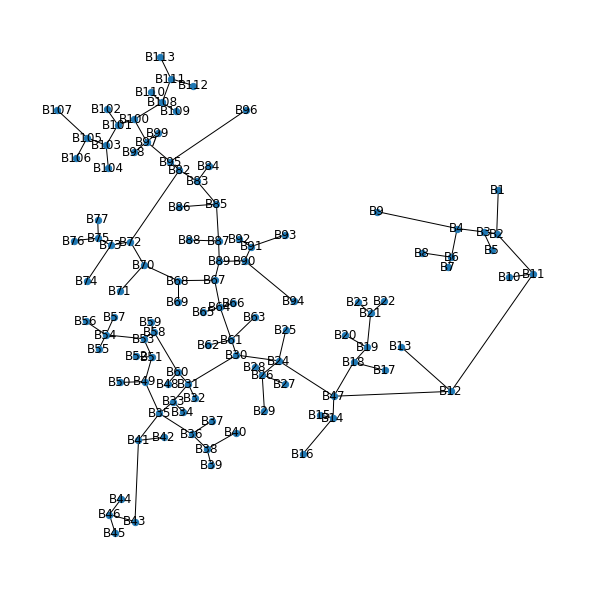

In [9]:
plt.figure(figsize=(8,8))
nx.draw(B, pos=node_positions_B, node_size=40, with_labels = True)

# Solution of CPP begins here.

In [10]:
list(G.nodes(data=True))[0:5] 

[('rs_end_north', {'X': 1772, 'Y': 172}),
 ('v_rs', {'X': 1793, 'Y': 484}),
 ('b_rs', {'X': 1747, 'Y': 700}),
 ('g_rs', {'X': 1676, 'Y': 775}),
 ('w_rs', {'X': 1646, 'Y': 947})]

## Generate a list of all odd vertices in G.

In [11]:
def nodes_odd_degree(G):
    a=[v for v, d in G.degree() if d % 2 == 1]
    return a

## Compute all pairs of odd nodes in a list of tuples.

In [12]:
# Compute all pairs of odd nodes. in a list of tuples
def odd_node_pairs(G):
    L=list(itertools.combinations(nodes_odd_degree(G), 2))
    return L

## Generate a dictionary which lists, for every pair of odd vertices, the distance of the shortest path between those vertices.

In [13]:
def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    """Compute shortest distance between each pair of nodes in a graph.\
       Return a dictionary keyed on node pairs (tuples)."""
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances

In [14]:
get_shortest_paths_distances(B, odd_node_pairs(B), 'distance')

{('B1', 'B2'): 413,
 ('B1', 'B3'): 590,
 ('B1', 'B4'): 990,
 ('B1', 'B5'): 980,
 ('B1', 'B6'): 1413,
 ('B1', 'B7'): 1551,
 ('B1', 'B8'): 1794,
 ('B1', 'B9'): 2112,
 ('B1', 'B10'): 1683,
 ('B1', 'B11'): 1325,
 ('B1', 'B12'): 3437,
 ('B1', 'B13'): 4418,
 ('B1', 'B14'): 5682,
 ('B1', 'B15'): 5948,
 ('B1', 'B16'): 6686,
 ('B1', 'B17'): 6604,
 ('B1', 'B18'): 6105,
 ('B1', 'B19'): 6390,
 ('B1', 'B20'): 6738,
 ('B1', 'B21'): 6921,
 ('B1', 'B22'): 7161,
 ('B1', 'B23'): 7131,
 ('B1', 'B25'): 6765,
 ('B1', 'B27'): 7122,
 ('B1', 'B28'): 6971,
 ('B1', 'B29'): 7358,
 ('B1', 'B30'): 7014,
 ('B1', 'B32'): 8051,
 ('B1', 'B33'): 8153,
 ('B1', 'B34'): 8376,
 ('B1', 'B36'): 8964,
 ('B1', 'B37'): 9322,
 ('B1', 'B38'): 9282,
 ('B1', 'B39'): 9597,
 ('B1', 'B40'): 9840,
 ('B1', 'B41'): 8901,
 ('B1', 'B42'): 9259,
 ('B1', 'B44'): 10564,
 ('B1', 'B45'): 10636,
 ('B1', 'B46'): 10351,
 ('B1', 'B48'): 8284,
 ('B1', 'B49'): 8908,
 ('B1', 'B50'): 9252,
 ('B1', 'B51'): 9275,
 ('B1', 'B52'): 9455,
 ('B1', 'B53'): 905

## Compute shortest paths.  Return a dictionary with node pairs keys and a single value equal to shortest path distance.



In [15]:
# Compute shortest paths.  Return a dictionary with node pairs keys and a single value equal to shortest path distance.
def odd_node_pairs_shortest_paths(G):
    L = get_shortest_paths_distances(G, odd_node_pairs(G), 'distance')
    return L


In [16]:
odd_node_pairs_shortest_paths(B)

{('B1', 'B2'): 413,
 ('B1', 'B3'): 590,
 ('B1', 'B4'): 990,
 ('B1', 'B5'): 980,
 ('B1', 'B6'): 1413,
 ('B1', 'B7'): 1551,
 ('B1', 'B8'): 1794,
 ('B1', 'B9'): 2112,
 ('B1', 'B10'): 1683,
 ('B1', 'B11'): 1325,
 ('B1', 'B12'): 3437,
 ('B1', 'B13'): 4418,
 ('B1', 'B14'): 5682,
 ('B1', 'B15'): 5948,
 ('B1', 'B16'): 6686,
 ('B1', 'B17'): 6604,
 ('B1', 'B18'): 6105,
 ('B1', 'B19'): 6390,
 ('B1', 'B20'): 6738,
 ('B1', 'B21'): 6921,
 ('B1', 'B22'): 7161,
 ('B1', 'B23'): 7131,
 ('B1', 'B25'): 6765,
 ('B1', 'B27'): 7122,
 ('B1', 'B28'): 6971,
 ('B1', 'B29'): 7358,
 ('B1', 'B30'): 7014,
 ('B1', 'B32'): 8051,
 ('B1', 'B33'): 8153,
 ('B1', 'B34'): 8376,
 ('B1', 'B36'): 8964,
 ('B1', 'B37'): 9322,
 ('B1', 'B38'): 9282,
 ('B1', 'B39'): 9597,
 ('B1', 'B40'): 9840,
 ('B1', 'B41'): 8901,
 ('B1', 'B42'): 9259,
 ('B1', 'B44'): 10564,
 ('B1', 'B45'): 10636,
 ('B1', 'B46'): 10351,
 ('B1', 'B48'): 8284,
 ('B1', 'B49'): 8908,
 ('B1', 'B50'): 9252,
 ('B1', 'B51'): 9275,
 ('B1', 'B52'): 9455,
 ('B1', 'B53'): 905

## 

In [17]:
def create_complete_graph(pair_weights, flip_weights=True):
    """
    Create a completely connected graph using a list of vertex pairs and the shortest path distances between them
    Parameters: 
        pair_weights: list[tuple] from the output of get_shortest_paths_distances
        flip_weights: Boolean. Should we negate the edge attribute in pair_weights?
    """
    g = nx.Graph()
    for k, v in pair_weights.items():
        wt_i = - v if flip_weights else v
        # g.add_edge(k[0], k[1], {'distance': v, 'weight': wt_i})  # deprecated after NX 1.11 
        g.add_edge(k[0], k[1], **{'distance': v, 'weight': wt_i})  
    return g


def odd_complete(G):
    return create_complete_graph(odd_node_pairs_shortest_paths(G), flip_weights=True)

## g_odd_complete(G) yields the complete graph on the collection of all vertices of odd degree, where edges have length equal to path distances

In [18]:
#H=create_complete_graph(odd_node_pairs_shortest_paths(G))
odd_complete(B)

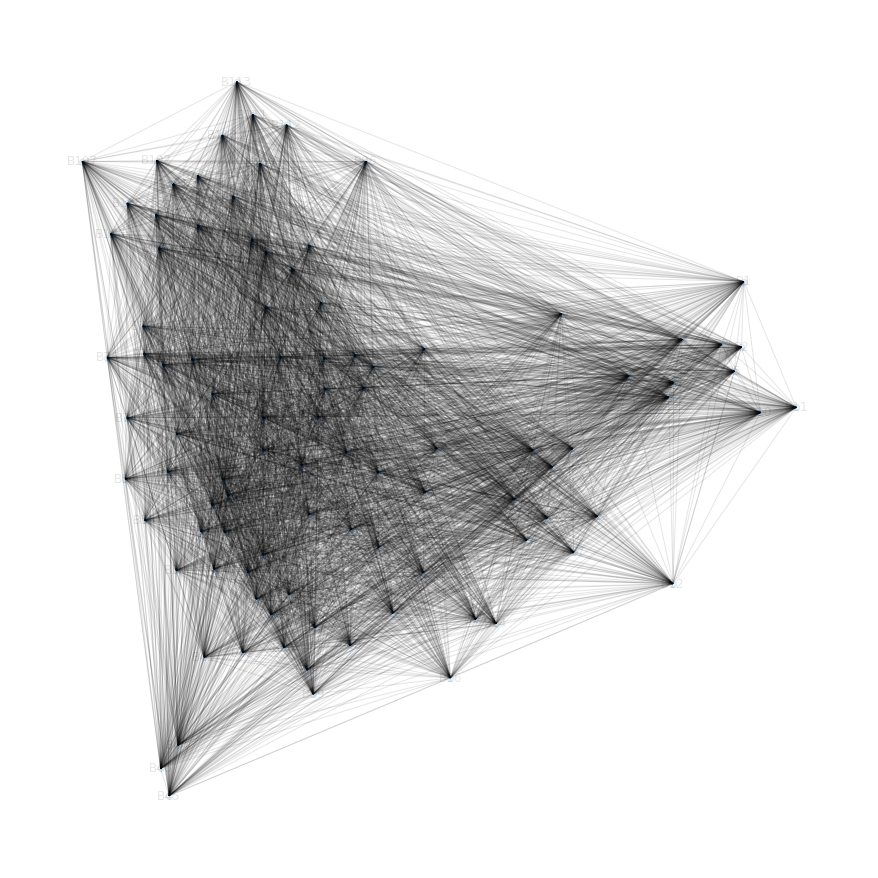

In [19]:
plt.figure(figsize=(12,12))
nx.draw(odd_complete(B), pos=node_positions_B, node_size=40, alpha=0.1, with_labels = True)

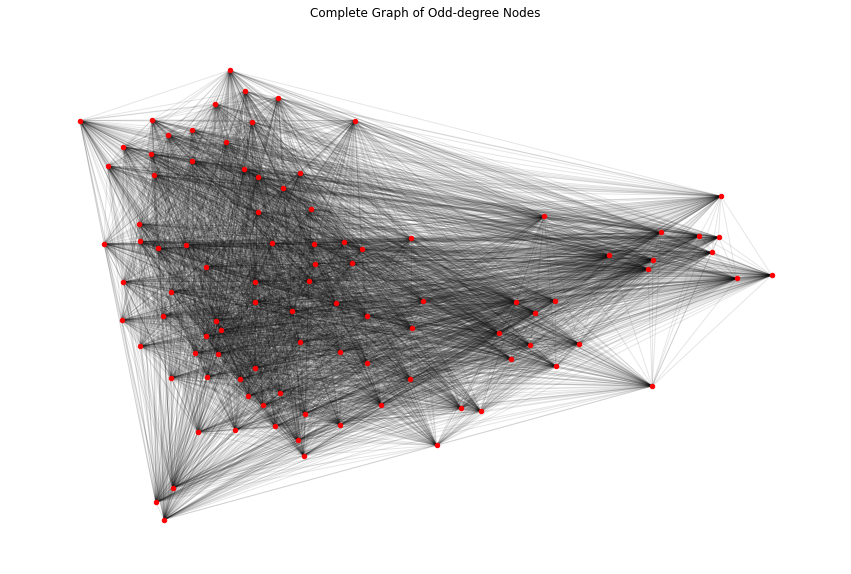

In [20]:
plt.figure(figsize=(15, 10))
pos_random = nx.random_layout(odd_complete(B))
nx.draw_networkx_nodes(odd_complete(B), pos=node_positions_B, node_size=20, node_color="red")
nx.draw_networkx_edges(odd_complete(B), pos=node_positions_B, alpha=0.1)
plt.axis('off')
plt.title('Complete Graph of Odd-degree Nodes')
plt.show()

In [21]:
# Compute min weight matching.
# Note: max_weight_matching uses the 'weight' attribute by default as the attribute to maximize.
def odd_matching_dupes(G):
    return nx.algorithms.max_weight_matching(odd_complete(G), True)

def odd_matching(G):
    return list(odd_matching_dupes(G))


In [22]:
len(odd_complete(B).edges())

4753

In [23]:
odd_matching(B)

[('B112', 'B111'),
 ('B21', 'B18'),
 ('B100', 'B106'),
 ('B34', 'B33'),
 ('B36', 'B42'),
 ('B27', 'B25'),
 ('B91', 'B92'),
 ('B45', 'B46'),
 ('B50', 'B49'),
 ('B93', 'B90'),
 ('B99', 'B110'),
 ('B14', 'B15'),
 ('B98', 'B82'),
 ('B66', 'B67'),
 ('B40', 'B39'),
 ('B103', 'B104'),
 ('B48', 'B60'),
 ('B83', 'B84'),
 ('B1', 'B32'),
 ('B11', 'B10'),
 ('B85', 'B86'),
 ('B72', 'B74'),
 ('B102', 'B101'),
 ('B19', 'B20'),
 ('B28', 'B29'),
 ('B62', 'B30'),
 ('B3', 'B2'),
 ('B12', 'B13'),
 ('B44', 'B41'),
 ('B105', 'B107'),
 ('B23', 'B22'),
 ('B69', 'B68'),
 ('B73', 'B76'),
 ('B59', 'B58'),
 ('B5', 'B4'),
 ('B37', 'B38'),
 ('B16', 'B17'),
 ('B95', 'B96'),
 ('B6', 'B9'),
 ('B89', 'B94'),
 ('B56', 'B57'),
 ('B71', 'B70'),
 ('B51', 'B52'),
 ('B7', 'B8'),
 ('B75', 'B77'),
 ('B63', 'B65'),
 ('B53', 'B55'),
 ('B87', 'B88'),
 ('B109', 'B113')]

In [24]:
list(odd_matching_dupes(B))

[('B112', 'B111'),
 ('B21', 'B18'),
 ('B100', 'B106'),
 ('B34', 'B33'),
 ('B36', 'B42'),
 ('B27', 'B25'),
 ('B91', 'B92'),
 ('B45', 'B46'),
 ('B50', 'B49'),
 ('B93', 'B90'),
 ('B99', 'B110'),
 ('B14', 'B15'),
 ('B98', 'B82'),
 ('B66', 'B67'),
 ('B40', 'B39'),
 ('B103', 'B104'),
 ('B48', 'B60'),
 ('B83', 'B84'),
 ('B1', 'B32'),
 ('B11', 'B10'),
 ('B85', 'B86'),
 ('B72', 'B74'),
 ('B102', 'B101'),
 ('B19', 'B20'),
 ('B28', 'B29'),
 ('B62', 'B30'),
 ('B3', 'B2'),
 ('B12', 'B13'),
 ('B44', 'B41'),
 ('B105', 'B107'),
 ('B23', 'B22'),
 ('B69', 'B68'),
 ('B73', 'B76'),
 ('B59', 'B58'),
 ('B5', 'B4'),
 ('B37', 'B38'),
 ('B16', 'B17'),
 ('B95', 'B96'),
 ('B6', 'B9'),
 ('B89', 'B94'),
 ('B56', 'B57'),
 ('B71', 'B70'),
 ('B51', 'B52'),
 ('B7', 'B8'),
 ('B75', 'B77'),
 ('B63', 'B65'),
 ('B53', 'B55'),
 ('B87', 'B88'),
 ('B109', 'B113')]

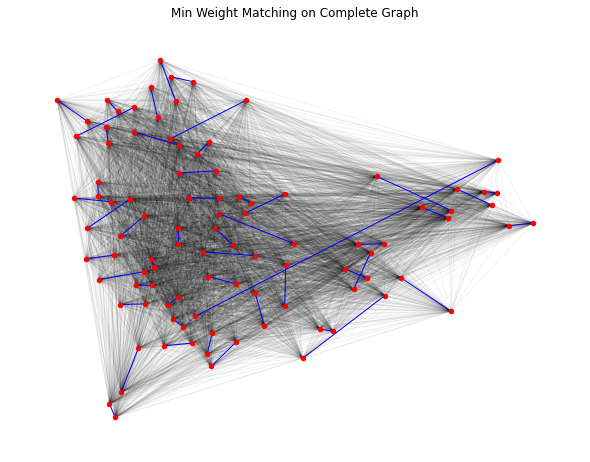

In [25]:
plt.figure(figsize=(8, 6))

# Plot the complete graph of odd-degree nodes
nx.draw(odd_complete(B), pos=node_positions_B, node_size=20, alpha=0.05)

# Create a new graph to overlay on g_odd_complete with just the edges from the min weight matching
g_odd_complete_min_edges = nx.Graph(odd_matching(B))
nx.draw(g_odd_complete_min_edges,pos=node_positions_B, node_size=20, edge_color='blue', node_color='red')

plt.title('Min Weight Matching on Complete Graph')
plt.show()

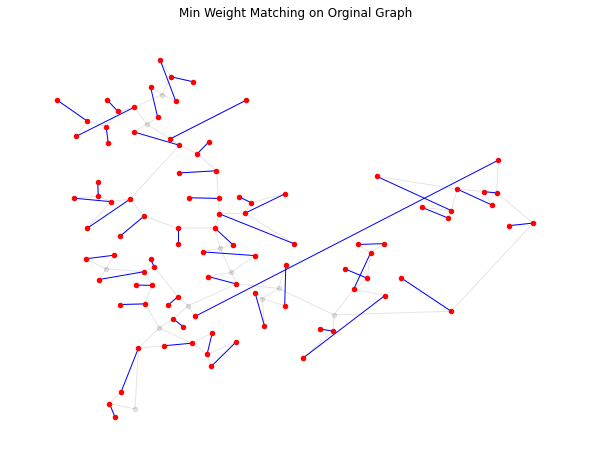

In [26]:
plt.figure(figsize=(8, 6))

# Plot the original trail map graph
nx.draw(B, pos=node_positions_B, node_size=20, alpha=0.1, node_color='black')

# Plot graph to overlay with just the edges from the min weight matching
nx.draw(g_odd_complete_min_edges, pos=node_positions_B, node_size=20, alpha=1, node_color='red', edge_color='blue')

plt.title('Min Weight Matching on Orginal Graph')
plt.show()

## Augmenting the original graph

In [27]:
def add_augmenting_path_to_graph(graph, min_weight_pairs):
    """
    Add the min weight matching edges to the original graph
    Parameters:
        graph: NetworkX graph (original graph from trailmap)
        min_weight_pairs: list[tuples] of node pairs from min weight matching
    Returns:
        augmented NetworkX graph
    """
    
    # We need to make the augmented graph a MultiGraph so we can add parallel edges
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        graph_aug.add_edge(pair[0], 
                           pair[1], 
                           **{'distance': nx.dijkstra_path_length(graph, pair[0], pair[1]), 'edgestatus': 'augmented'}
                           # attr_dict={'distance': nx.dijkstra_path_length(graph, pair[0], pair[1]),
                           #            'trail': 'augmented'}  # deprecated after 1.11
                          )
    return graph_aug


In [28]:
g_aug = add_augmenting_path_to_graph(B, odd_matching(B))

In [29]:
g_aug

In [30]:
pd.value_counts([e[1] for e in g_aug.degree()])

2    59
4    50
dtype: int64

In [31]:
naive_euler_circuit = list(nx.eulerian_circuit(g_aug, source='B1'))

In [32]:
naive_euler_circuit

[('B1', 'B32'),
 ('B32', 'B31'),
 ('B31', 'B60'),
 ('B60', 'B48'),
 ('B48', 'B60'),
 ('B60', 'B58'),
 ('B58', 'B59'),
 ('B59', 'B58'),
 ('B58', 'B53'),
 ('B53', 'B55'),
 ('B55', 'B54'),
 ('B54', 'B56'),
 ('B56', 'B57'),
 ('B57', 'B54'),
 ('B54', 'B53'),
 ('B53', 'B51'),
 ('B51', 'B52'),
 ('B52', 'B51'),
 ('B51', 'B49'),
 ('B49', 'B50'),
 ('B50', 'B49'),
 ('B49', 'B35'),
 ('B35', 'B41'),
 ('B41', 'B44'),
 ('B44', 'B46'),
 ('B46', 'B45'),
 ('B45', 'B46'),
 ('B46', 'B43'),
 ('B43', 'B41'),
 ('B41', 'B42'),
 ('B42', 'B36'),
 ('B36', 'B38'),
 ('B38', 'B40'),
 ('B40', 'B39'),
 ('B39', 'B38'),
 ('B38', 'B37'),
 ('B37', 'B36'),
 ('B36', 'B35'),
 ('B35', 'B33'),
 ('B33', 'B34'),
 ('B34', 'B33'),
 ('B33', 'B31'),
 ('B31', 'B30'),
 ('B30', 'B62'),
 ('B62', 'B61'),
 ('B61', 'B64'),
 ('B64', 'B67'),
 ('B67', 'B89'),
 ('B89', 'B94'),
 ('B94', 'B90'),
 ('B90', 'B93'),
 ('B93', 'B91'),
 ('B91', 'B92'),
 ('B92', 'B91'),
 ('B91', 'B90'),
 ('B90', 'B89'),
 ('B89', 'B87'),
 ('B87', 'B88'),
 ('B88', 'B87')

In [33]:
def create_eulerian_circuit(graph_augmented, graph_original, starting_node=None):
    """Create the eulerian path using only edges from the original graph."""
    euler_circuit = []
    naive_circuit = list(nx.eulerian_circuit(graph_augmented, source=starting_node))
    
    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])    
        
        if edge_data[0]['edgestatus'] != 'augmented':
            # If `edge` exists in original graph, grab the edge attributes and add to eulerian circuit.
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att)) 
        else: 
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='distance')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))
            
            print('Filling in edges for augmented edge: {}'.format(edge))
            print('Augmenting path: {}'.format(' => '.join(aug_path)))
            print('Augmenting path pairs: {}\n'.format(aug_path_pairs))
            
            # If `edge` does not exist in original graph, find the shortest path between its nodes and 
            #  add the edge attributes for each link in the shortest path.
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))
                                      
    return euler_circuit

In [34]:
 euler_circuit=create_eulerian_circuit(g_aug, B, 'B56')

Filling in edges for augmented edge: ('B56', 'B57')
Augmenting path: B56 => B54 => B57
Augmenting path pairs: [('B56', 'B54'), ('B54', 'B57')]

Filling in edges for augmented edge: ('B55', 'B53')
Augmenting path: B55 => B54 => B53
Augmenting path pairs: [('B55', 'B54'), ('B54', 'B53')]

Filling in edges for augmented edge: ('B32', 'B1')
Augmenting path: B32 => B31 => B30 => B24 => B47 => B12 => B11 => B2 => B1
Augmenting path pairs: [('B32', 'B31'), ('B31', 'B30'), ('B30', 'B24'), ('B24', 'B47'), ('B47', 'B12'), ('B12', 'B11'), ('B11', 'B2'), ('B2', 'B1')]

Filling in edges for augmented edge: ('B9', 'B6')
Augmenting path: B9 => B4 => B6
Augmenting path pairs: [('B9', 'B4'), ('B4', 'B6')]

Filling in edges for augmented edge: ('B8', 'B7')
Augmenting path: B8 => B6 => B7
Augmenting path pairs: [('B8', 'B6'), ('B6', 'B7')]

Filling in edges for augmented edge: ('B4', 'B5')
Augmenting path: B4 => B3 => B5
Augmenting path pairs: [('B4', 'B3'), ('B3', 'B5')]

Filling in edges for augmented 

In [35]:
euler_circuit

[('B56', 'B54', {'distance': 276, 'pickups': 5, 'edgestatus': ' Existing'}),
 ('B54', 'B57', {'distance': 197, 'pickups': 5, 'edgestatus': ' Existing'}),
 ('B57', 'B54', {'distance': 197, 'pickups': 5, 'edgestatus': ' Existing'}),
 ('B54', 'B55', {'distance': 207, 'pickups': 5, 'edgestatus': ' Existing'}),
 ('B55', 'B54', {'distance': 207, 'pickups': 5, 'edgestatus': ' Existing'}),
 ('B54', 'B53', {'distance': 574, 'pickups': 2, 'edgestatus': ' Existing'}),
 ('B53', 'B58', {'distance': 210, 'pickups': 1, 'edgestatus': ' Existing'}),
 ('B58', 'B59', {'distance': 148, 'pickups': 8, 'edgestatus': ' Existing'}),
 ('B59', 'B58', {'distance': 148, 'pickups': 8, 'edgestatus': ' Existing'}),
 ('B58', 'B60', {'distance': 764, 'pickups': 22, 'edgestatus': ' Existing'}),
 ('B60', 'B48', {'distance': 203, 'pickups': 10, 'edgestatus': ' Existing'}),
 ('B48', 'B60', {'distance': 203, 'pickups': 10, 'edgestatus': ' Existing'}),
 ('B60', 'B31', {'distance': 253, 'pickups': 5, 'edgestatus': ' Existing'

In [36]:
for i, edge in enumerate(euler_circuit[0:20]):
    print(i, edge)

0 ('B56', 'B54', {'distance': 276, 'pickups': 5, 'edgestatus': ' Existing'})
1 ('B54', 'B57', {'distance': 197, 'pickups': 5, 'edgestatus': ' Existing'})
2 ('B57', 'B54', {'distance': 197, 'pickups': 5, 'edgestatus': ' Existing'})
3 ('B54', 'B55', {'distance': 207, 'pickups': 5, 'edgestatus': ' Existing'})
4 ('B55', 'B54', {'distance': 207, 'pickups': 5, 'edgestatus': ' Existing'})
5 ('B54', 'B53', {'distance': 574, 'pickups': 2, 'edgestatus': ' Existing'})
6 ('B53', 'B58', {'distance': 210, 'pickups': 1, 'edgestatus': ' Existing'})
7 ('B58', 'B59', {'distance': 148, 'pickups': 8, 'edgestatus': ' Existing'})
8 ('B59', 'B58', {'distance': 148, 'pickups': 8, 'edgestatus': ' Existing'})
9 ('B58', 'B60', {'distance': 764, 'pickups': 22, 'edgestatus': ' Existing'})
10 ('B60', 'B48', {'distance': 203, 'pickups': 10, 'edgestatus': ' Existing'})
11 ('B48', 'B60', {'distance': 203, 'pickups': 10, 'edgestatus': ' Existing'})
12 ('B60', 'B31', {'distance': 253, 'pickups': 5, 'edgestatus': ' Exist

In [37]:
def create_cpp_edgelist(euler_circuit):
    """
    Create the edgelist without parallel edge for the visualization
    Combine duplicate edges and keep track of their sequence and # of walks
    Parameters:
        euler_circuit: list[tuple] from create_eulerian_circuit
    """
    cpp_edgelist = {}

    for i, e in enumerate(euler_circuit):
        edge = frozenset([e[0], e[1]])

        if edge in cpp_edgelist:
            cpp_edgelist[edge][2]['sequence'] += ', ' + str(i)
            cpp_edgelist[edge][2]['visits'] += 1

        else:
            cpp_edgelist[edge] = e
            cpp_edgelist[edge][2]['sequence'] = str(i)
            cpp_edgelist[edge][2]['visits'] = 1
        
    return list(cpp_edgelist.values())

In [38]:
cpp_edgelist = create_cpp_edgelist(euler_circuit)

In [39]:
g_cpp = nx.Graph(cpp_edgelist)

In [40]:
g_cpp.edges

EdgeView([('B56', 'B54'), ('B54', 'B57'), ('B54', 'B55'), ('B54', 'B53'), ('B53', 'B58'), ('B53', 'B51'), ('B58', 'B59'), ('B58', 'B60'), ('B60', 'B48'), ('B60', 'B31'), ('B31', 'B32'), ('B31', 'B30'), ('B31', 'B33'), ('B30', 'B24'), ('B30', 'B61'), ('B24', 'B47'), ('B24', 'B26'), ('B24', 'B25'), ('B47', 'B12'), ('B47', 'B18'), ('B47', 'B14'), ('B12', 'B11'), ('B12', 'B13'), ('B11', 'B2'), ('B11', 'B10'), ('B2', 'B1'), ('B2', 'B3'), ('B3', 'B4'), ('B3', 'B5'), ('B4', 'B9'), ('B4', 'B6'), ('B6', 'B8'), ('B6', 'B7'), ('B18', 'B19'), ('B18', 'B17'), ('B19', 'B21'), ('B19', 'B20'), ('B21', 'B23'), ('B21', 'B22'), ('B14', 'B16'), ('B14', 'B15'), ('B26', 'B29'), ('B26', 'B28'), ('B26', 'B27'), ('B61', 'B62'), ('B61', 'B64'), ('B61', 'B63'), ('B64', 'B67'), ('B64', 'B66'), ('B64', 'B65'), ('B67', 'B89'), ('B67', 'B68'), ('B89', 'B90'), ('B89', 'B87'), ('B90', 'B94'), ('B90', 'B91'), ('B91', 'B93'), ('B91', 'B92'), ('B87', 'B88'), ('B87', 'B85'), ('B85', 'B86'), ('B85', 'B83'), ('B83', 'B84'),

In [41]:
euler_circuit

[('B56',
  'B54',
  {'distance': 276,
   'pickups': 5,
   'edgestatus': ' Existing',
   'sequence': '0, 202',
   'visits': 2}),
 ('B54',
  'B57',
  {'distance': 197,
   'pickups': 5,
   'edgestatus': ' Existing',
   'sequence': '1, 2',
   'visits': 2}),
 ('B57',
  'B54',
  {'distance': 197,
   'pickups': 5,
   'edgestatus': ' Existing',
   'sequence': '1, 2',
   'visits': 2}),
 ('B54',
  'B55',
  {'distance': 207,
   'pickups': 5,
   'edgestatus': ' Existing',
   'sequence': '3, 4',
   'visits': 2}),
 ('B55',
  'B54',
  {'distance': 207,
   'pickups': 5,
   'edgestatus': ' Existing',
   'sequence': '3, 4',
   'visits': 2}),
 ('B54',
  'B53',
  {'distance': 574,
   'pickups': 2,
   'edgestatus': ' Existing',
   'sequence': '5, 201',
   'visits': 2}),
 ('B53',
  'B58',
  {'distance': 210,
   'pickups': 1,
   'edgestatus': ' Existing',
   'sequence': '6',
   'visits': 1}),
 ('B58',
  'B59',
  {'distance': 148,
   'pickups': 8,
   'edgestatus': ' Existing',
   'sequence': '7, 8',
   'visit

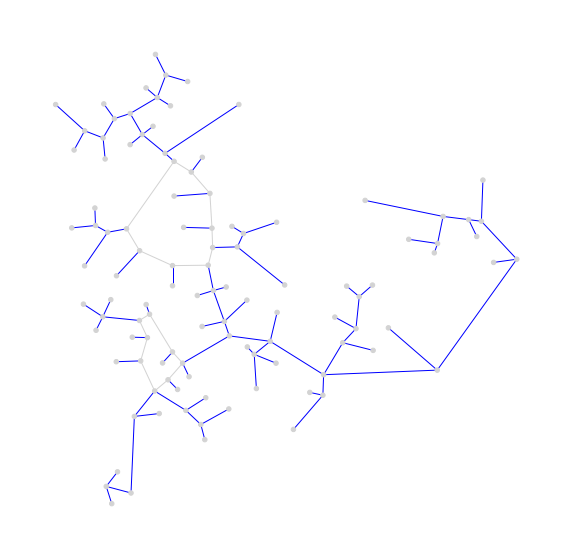

In [42]:
plt.figure(figsize=(10, 10))

visit_colors = {1:'lightgray', 2:'blue'}
edge_colors = [visit_colors[e[2]['visits']] for e in g_cpp.edges(data=True)]
node_colors = ['red'  if node in nodes_odd_degree(G) else 'lightgray' for node in g_cpp.nodes()]

nx.draw_networkx(g_cpp, pos=node_positions_B, node_size=20, node_color=node_colors, edge_color=edge_colors, with_labels=False)
plt.axis('off')
plt.show()

In [43]:
euler_circuit_2= copy.deepcopy(euler_circuit[0:2])
euler_circuit_2

[('B56',
  'B54',
  {'distance': 276,
   'pickups': 5,
   'edgestatus': ' Existing',
   'sequence': '0, 202',
   'visits': 2}),
 ('B54',
  'B57',
  {'distance': 197,
   'pickups': 5,
   'edgestatus': ' Existing',
   'sequence': '1, 2',
   'visits': 2})]

TypeError: draw_networkx_nodes() got an unexpected keyword argument 'with_labels'

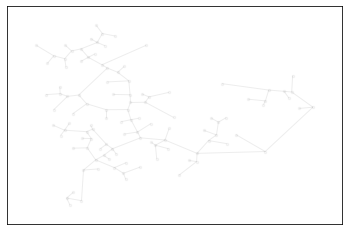

In [44]:
%matplotlib inline

visit_colors = {1:'black', 2:'red'}
edge_cnter = {}
g_i_edge_colors = []
for i, e in enumerate(euler_circuit, start=1):

    edge = frozenset([e[0], e[1]])
    if edge in edge_cnter:
        edge_cnter[edge] += 1
    else:
        edge_cnter[edge] = 1

    # Full graph (faded in background)
    nx.draw_networkx(B, pos=node_positions_B, node_size=6, node_color='gray', with_labels=False, alpha=0.07)

    # Edges walked as of iteration i
    euler_circuit_i = copy.deepcopy(euler_circuit[0:i])
    for i in range(len(euler_circuit_i)):
        edge_i = frozenset([euler_circuit_i[i][0], euler_circuit_i[i][1]])
        euler_circuit_i[i][2]['visits_i'] = edge_cnter[edge_i]
    g_i = nx.Graph(euler_circuit_i)
    g_i_edge_colors = [visit_colors[e[2]['visits_i']] for e in g_i.edges(data=True)]

    nx.draw_networkx_nodes(g_i, pos=node_positions_B, node_size=6, alpha=0.6, node_color='lightgray', with_labels=False, linewidths=0.1)
    nx.draw_networkx_edges(g_i, pos=node_positions_B, edge_color=g_i_edge_colors, alpha=0.8)

    plt.axis('off')
    plt.savefig('fig/png/img{}.png'.format(i), dpi=120, bbox_inches='tight')
    plt.close()

In [45]:
%matplotlib inline

def make_circuit_video(image_path, movie_filename, fps=5):
    # sorting filenames in order
    filenames = glob.glob(image_path + 'img*.png')
    filenames_sort_indices = np.argsort([int(os.path.basename(filename).split('.')[0][3:]) for filename in filenames])
    filenames = [filenames[i] for i in filenames_sort_indices]

    # make movie
    with imageio.get_writer(movie_filename, mode='I', fps=fps) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

make_circuit_video('fig/png/', 'fig/gif/cpp_route_animation.gif', fps=3)